In [ ]:
# Run this cell!
!pip install matplotlib
import matplotlib.pyplot as plt
import collections
import statistics

def generate_barplot(number_dict):
    sorted_dict = collections.OrderedDict(sorted(number_dict.items()))
    plt.bar(range(len(sorted_dict)), list(sorted_dict.values()), align='center')
    plt.xlabel("Numbers in our kitty_generator")
    plt.ylabel("Occurrences")
    plt.title("Random???")
    plt.xticks(range(len(sorted_dict)), list(sorted_dict.keys()))

# Kitty Randomness!

![](images/20230112140712.png)  

So this kitty has been using Python's random number generator, but he wants to check whether or not it's really random. For this you'll make two things: A random numbered list generator, and a function that converts it to a dictionary with counts.

To not make things too complicated, we'll start with the random list generator first. Here are some helpful guidelines:

* Create function called generate(a, b, n) 
* It must generate random INTEGERS between a and b, n times, packed together in a list. For this, use random.randint()
* So generate(1, 3, 8) could generate something like [1, 2, 3, 2, 3, 1, 2, 2]
* Don't forget to return the list!
* Remember, you don't need to immediately make a function, you can try things out in a cell before you commit to a function

Another little hint, you can do all of this in a SINGLE line ;)




In [28]:
# Make your random number generator here!
import random



In [53]:
# Example Solution
















def generate(a, b, n):
    return [random.randint(a, b) for x in range(n)]

generate(1, 4, 4)

[3, 2, 1, 4]

# Part two

![](images/20230112141721.png)  

Good job! With his random list generator, the kitty has become the master of the fabric of the cosmos, as indicated by the "9" on his private parts, awesome! Now for the next part, this is something you already have some experience with. We're going to want to call our generate() function and store the list. Then we'll work on the following task:

* Create a function called dict_counter(random_list) that takes as input any random list that we generate, and counts all the items in it. You may not use Counter() for this, do it using python.
* The "Keys" of the dictionary will have to be integers, the values as well
* So something like {1 : 200, 2: 399, ...}, where number one occurred 200 times, and number two 399 times. You won't need to order them, as the kitty already created a function that does all that for you.
* For the love of wetfood, return the dictionary!

Since the function the kitty made will plot all the number occurrences, it is advisable to not make "a" and "b" in generate(a, b, n) too large, as this will be weird to plot.

In [ ]:
# Work here


In [64]:
# Example solution












random_list = generate(1, 10, 500)

def dict_counter(random_list):
    number_dict = {}
    for num in random_list:
        if num in number_dict:
            number_dict[num] += 1
        else:
            number_dict[num] = 1
    return number_dict


occurrence_dict = dict_counter(random_list)

Great! Now for the pretty part, throw your dictionary into this function. If it doesn't work, run the top-most cell in this notebook again.

* What happens when the amount of random numbers increase?
* Do you see any bias?
* What would adding a random seed do?

In [ ]:
generate_barplot(occurrence_dict)

# Kitty Stats

![](images/20230112152130.png)  

Given the kitty's godlike status amongst his peers, he has now become a Nobel lauriate and has been studying his functions in the lab. He wants to make a function (although you'll make it....) that:

* Takes a desired standard deviation
* And keeps generating number lists until the standard deviation of the counts is of a certain size

Your function will be called check_sd(sd) that takes in a desired standard deviation, and does not return anything. The generation can stop when the standard deviation of the random list is lower.


In [194]:
# Some example code to help

random_list = generate(1, 10, 100)
count_dict = dict_counter(random_list)
print("Example Count Dictionary:\t", count_dict)

# Example values of occurrences
occurrences = [22, 17, 20, 23, 18]
print("Example Occurrences:\t\t", occurrences)

# Getting the standard deviation:
print("Example STD:\t\t\t", statistics.stdev(occurrences) / len(occurrences)) # DIVIDED BY N OCCURRENCES!!!


Example Count Dictionary:	 {1: 11, 8: 11, 9: 11, 7: 16, 4: 10, 6: 13, 2: 10, 3: 11, 5: 4, 10: 3}
Example Occurrences:		 [22, 17, 20, 23, 18]
Example STD:			 0.5099019513592784


Your job is to:

* Create a function called check_sd(sd)
* Using a for loop (up to 5000 iterations), keeps generating number lists using your generate(a, b, n) function with higher n's each loop. START WITH N = 50
* Every time, create a dictionary with counts
* And finally, check if the standard deviation of those counts is lower or equal to the desired standard deviation. DIVIDE THE STANDARD DEVIATION BY "n"!!

When you found the "n" at which the standard deviation is lower or equal to the desired amount, print your "n", and use our generate_barplot(dict) function to plot it. That's it!

In [ ]:
# Work here, again, divide the standard deviation by N
def check_sd(sd):
    for loop in range(50, 5000):

        # will print our number of loops every time
        if loop % 500 == 0:
            print(f"[{loop}] loops..")

        # Now continue here
        ..







check_sd(0.002)

[500] iterations..
[1000] iterations..
[1500] iterations..
[2000] iterations..
[2500] iterations..
[3000] iterations..
[3500] iterations..
[4000] iterations..

 Found SD 0.002, at 4100 random samples!


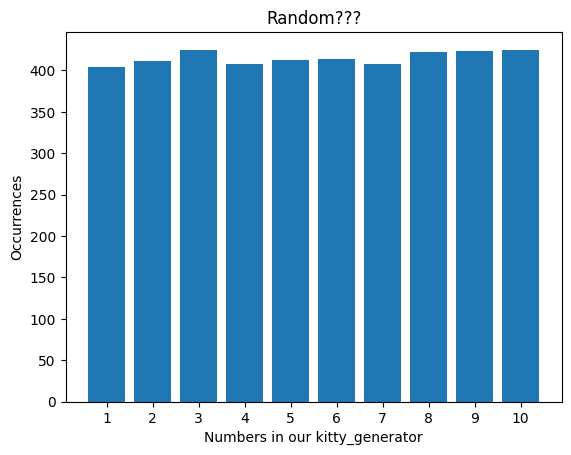

In [211]:
# Example solution












def check_sd(sd):
    for iter in range(50, 5000):
        if iter % 500 == 0:
            print(f"[{iter}] iterations..")
        random_list = generate(1, 10, iter + 50)
        count_dict = dict_counter(random_list)
        if statistics.stdev(list(count_dict.values())) / iter <= sd:
            print(f"\n Found SD {sd}, at {iter} random samples!")
            generate_barplot(count_dict)
            break

check_sd(0.002)